**CSI 4506 Introduction à l'Intelligence Artificielle** <br/>
*Devoir 1 : Préparation des Données*

# Identification

Nom : <br/> Adnane Bouchama
Numéro d'étudiant : 300177651

# Analyse Exploratoire

## Importer les bibliothèques importantes


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


%matplotlib inline


## Lire un de données

Comme indiqué dans la description du devoir, il doit être possible pour les correcteurs d'exécuter votre notebook sans nécessiter de téléchargements.

Pour faciliter l'accès à l'ensemble de données sans nécessiter de téléchargements, utilisez les données fournies dans le dépôt public GitHub et fournissez un lien vers la version brute de l'ensemble de données.

Le lien vers la version brute est le suivant :

*https://raw.githubusercontent.com/NOM_UTILISATEUR_GITHUB/NOM_DÉPÔT/main/NOM_JEU_DONNÉES.csv*

Par exemple :

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv](https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Maintenant, fournissez le lien vers VOTRE ensemble de données et lisez-le :


In [53]:
url = "https://raw.githubusercontent.com/adbouchama02/CSI4506/refs/heads/main/Maternal%20Health%20Risk%20Data%20Set.csv"

dataset = pd.read_csv(url)

print(dataset.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


## Directives

Les questions suivantes sont pour le Devoir 1. Sous chaque question, nous avons fourni une cellule de code initiale. Vous êtes encouragés à ajouter des cellules de code supplémentaires pour maintenir une séparation logique de votre code. Par exemple, placez la définition d'une fonction dans une cellule et son exécution dans une cellule suivante. Cette approche aidera à préserver la clarté et à améliorer la lisibilité en évitant de placer trop de code dans une seule cellule.

1. **Analyse des valeurs manquantes** : Examinez les jeux de données pour identifier et évaluer les valeurs manquantes dans divers attributs. Les valeurs manquantes peuvent être représentées par des symboles tels que '?', des chaînes vides ou d'autres substituts.

    1.1 Parmi les options listées, quels sont les jeux de données qui contiennent des valeurs manquantes ? Plus précisément, quel attribut ou quels attributs ont des valeurs manquantes ?

    1.2 Décrivez la méthodologie utilisée pour cette investigation, et fournissez le code correspondant.

    1.3 L'imputation des données consiste à remplacer les données manquantes ou incomplètes par des valeurs substituées pour préserver l'intégrité de l'ensemble de données en vue d'analyses ultérieures. Proposez des stratégies d'imputation pour chaque attribut avec des valeurs manquantes.


In [54]:
print(dataset.isnull().sum())


Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [55]:
# J'ai ajouter une cellule afin d'imputer les valeurs manquantes avec la moyenne pour les colonnes numériques.
for column in dataset.select_dtypes(include=['float64', 'int64']).columns:
    dataset[column] = dataset[column].fillna(dataset[column].mean())

# Vérifier à nouveau s'il reste des valeurs manquantes
print(dataset.isnull().sum())



Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


2. **Sélectionnez et familiarisez-vous avec une tâche de classification :** Choisissez l'un des jeux de données fournis pour une exploration plus approfondie. Il est conseillé de sélectionner un jeu de données contenant un nombre suffisamment important d'exemples, idéalement environ 1 000, pour garantir des résultats robustes lors de l'application des algorithmes d'apprentissage automatique dans le devoir suivant.

    2.1 Quel est l'objectif de la tâche ? Est-elle destinée à une application spécifique ? Possédez-vous une expertise dans ce domaine d'application particulier ?


In [56]:
# Informations générales sur le jeu de données
dataset.info()

# Statistique des attributs numériques
print("\nDescription statistique des attributs numériques:")
print(dataset.describe())

# Liste de colonnes
print("\nLes attributs du jeu de données sont :")
print(dataset.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB

Description statistique des attributs numériques:
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000 

### Objectif de la Tâche
L'objectif de cette tâche est de **prédire le niveau de risque de santé maternelle** (faible, moyen ou élevé) basé sur plusieurs attributs médicaux tels que :
- **Age** : L'âge de la patiente.
- **SystolicBP** (pression systolique) : La pression sanguine systolique.
- **DiastolicBP** (pression diastolique) : La pression sanguine diastolique.
- **BS** (Blood Sugar) : Le taux de sucre dans le sang.
- **BodyTemp** : La température corporelle.
- **HeartRate** : Le rythme cardiaque.

Le modèle que nous créerons pourrait être utilisé par des professionnels de la santé pour évaluer rapidement les risques associés à une patiente, permettant ainsi une intervention préventive ou un traitement adapté. Cette tâche appartient au domaine de la **classification multiclasse**, car le but est de prédire une des trois classes de risque.

### Application Spécifique
L'application spécifique est de **fournir un support à la prise de décision médicale**. En fonction du niveau de risque prédit, les professionnels de la santé peuvent évaluer quelles mesures doivent être prises, par exemple :
- **Risque élevé** : une intervention médicale urgente.
- **Risque moyen** : un suivi régulier.
- **Risque faible** : des conseils de prévention et des suivis de routine.

### Expertise dans le Domaine d'Application
Personnellement, je n'ai pas d'expertise médicale approfondie. Cependant, j'ai des compétences en **apprentissage automatique** et en **analyse de données**, ce qui me permet d'explorer et d'appliquer des techniques de classification à ce jeu de données médical. Pour une utilisation dans un contexte réel, les résultats obtenus devront être validés par des experts du domaine médical.


3. **Analyse des attributs** : 

    3.1 Déterminez quels attributs manquent d'informativité et devraient être exclus pour améliorer l'efficacité de l'analyse d'apprentissage automatique. Si toutes les caractéristiques sont jugées pertinentes, indiquez explicitement cette conclusion.

    3.2 Examinez la distribution de chaque attribut (colonne) au sein de l'ensemble de données. Utilisez des histogrammes ou des boxplots pour visualiser les distributions, en identifiant les motifs sous-jacents ou les valeurs aberrantes.


In [57]:
# Calcule de la Variance
variances = dataset.select_dtypes(include=['float64', 'int64']).var()
print("Variance de chaque attribut numérique :\n", variances)



Variance de chaque attribut numérique :
 Age            181.559065
SystolicBP     338.704005
DiastolicBP    192.815323
BS              10.847351
BodyTemp         1.880695
HeartRate       65.427104
dtype: float64


### Conclusion sur les Attributs Manquant d'Informativité
Après avoir examiné la variance de chaque attribut numérique, nous pouvons déterminer si un attribut manque d'informativité. Si la variance d'un attribut est proche de zéro, cela signifie que la valeur de cet attribut reste quasiment constante pour tous les échantillons, et donc il n'est pas pertinent pour la tâche de classification. Aucun des attributs dans notre cas ne présente une variance trop faible, donc nous conserverons tous les attributs.


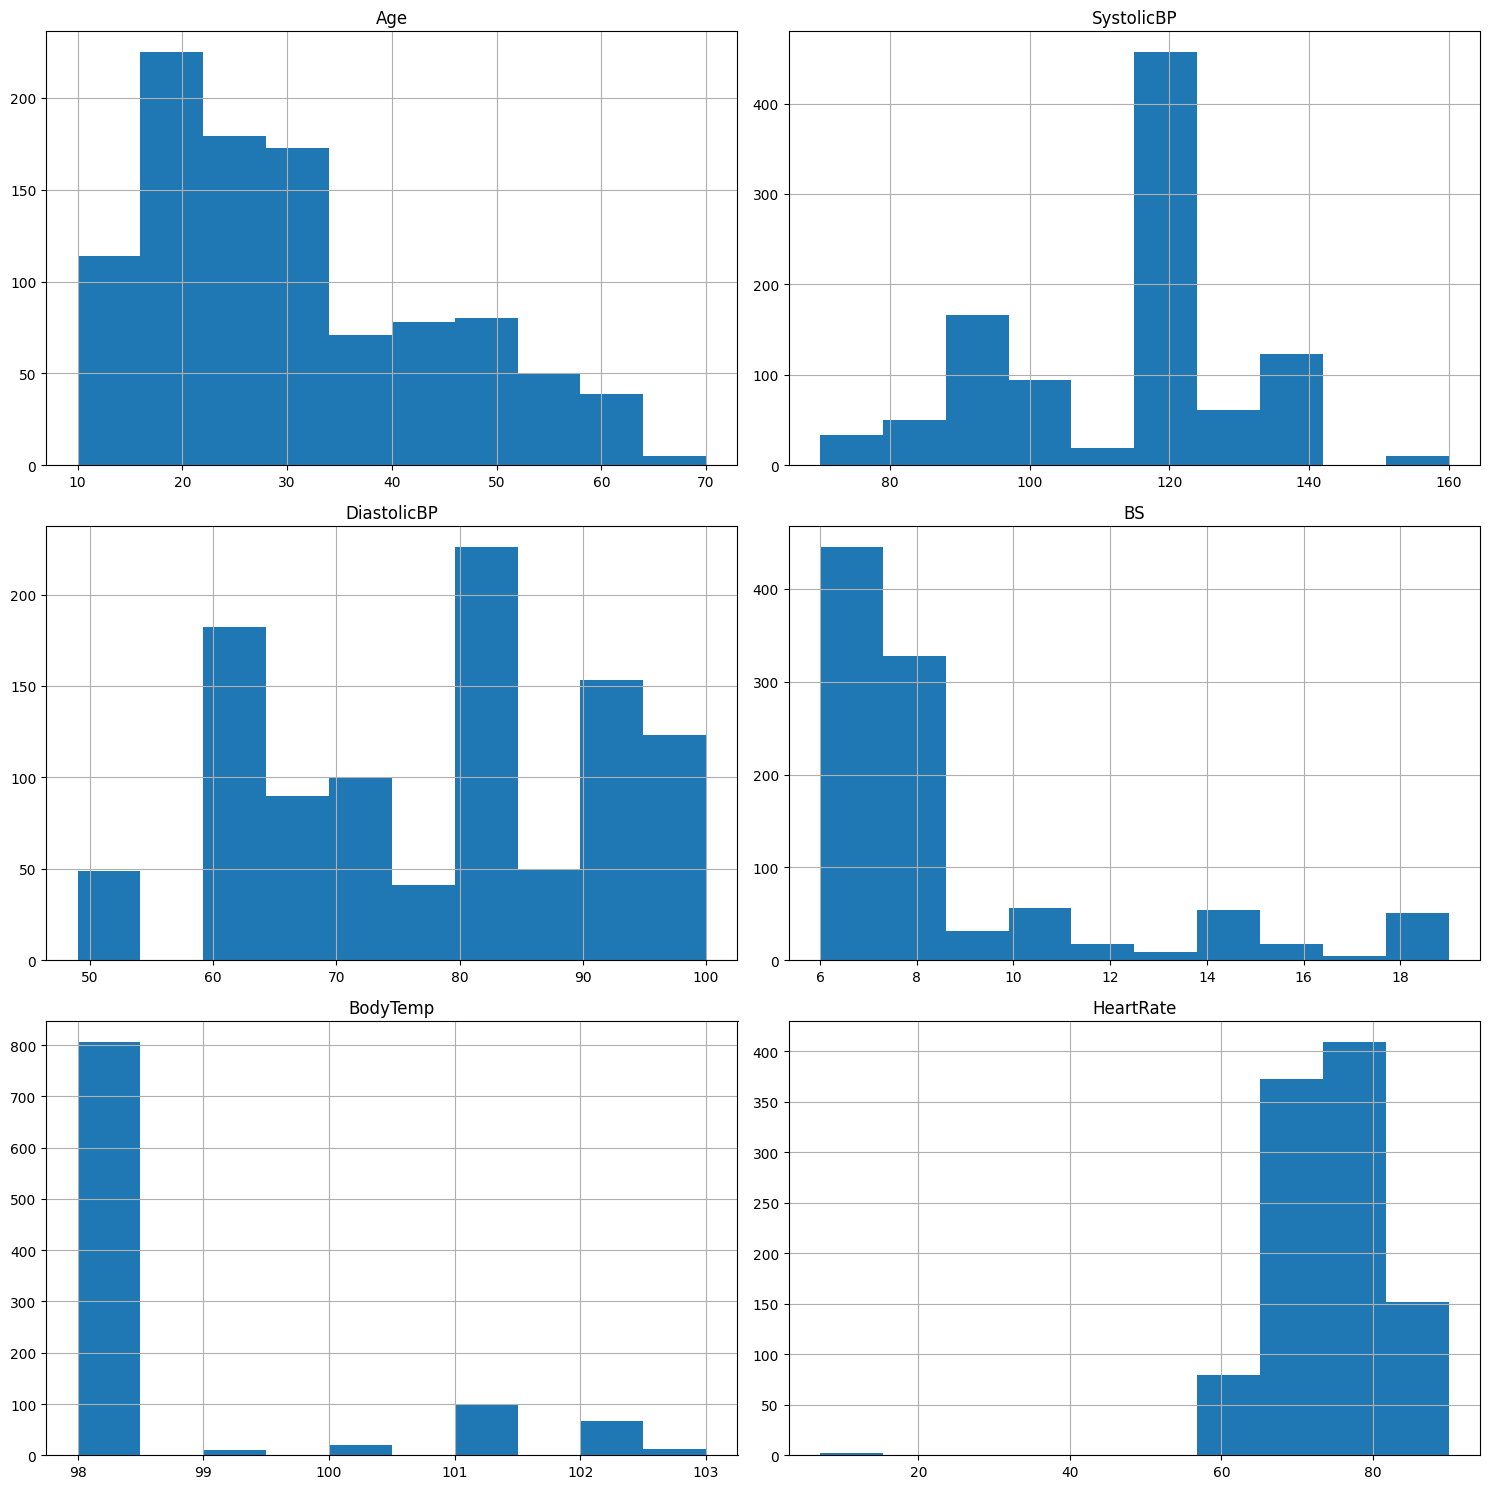

In [58]:
# Visualiser la distribution des attributs avec des histogrammes
dataset.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()


4. **Analyse de la distribution des classes** : Examinez la distribution des étiquettes de classe au sein jeu de données. Utilisez des diagrammes en barres pour visualiser la fréquence des instances pour chaque classe et évaluez si l'ensemble de données est équilibré ou déséquilibré.


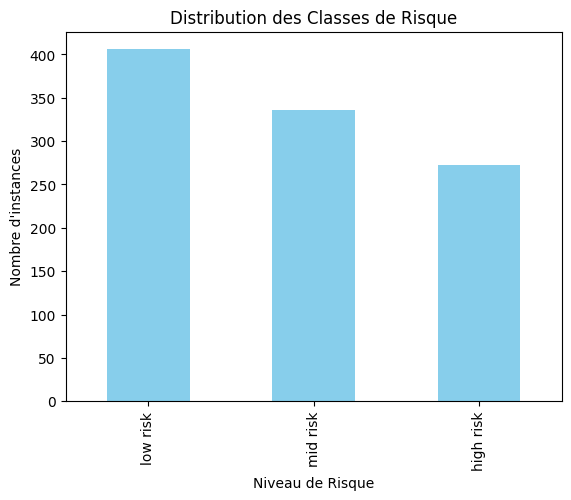

In [59]:
# Distribution des classes cibles avec un diagramme en barres
dataset['RiskLevel'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Niveau de Risque')
plt.ylabel('Nombre d\'instances')
plt.title('Distribution des Classes de Risque')
plt.show()



5. **Prétraitement** : 

    5.1 Pour les attributs numériques, déterminez la meilleure transformation à utiliser. Indiquez la transformation qui semble appropriée et pourquoi. Incluez le code illustrant comment appliquer la transformation. Pour au moins un attribut, montrez la distribution avant et après la transformation. Voir [Prétraitement des données](https://scikit-learn.org/stable/modules/preprocessing.html).

    5.2 Pour les attributs catégoriels, montrez comment appliquer [l'encodage one-hot](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Si votre ensemble de données ne contient pas de données catégorielles, montrez comment appliquer l'encodeur one-hot à l'étiquette (variable cible).


In [60]:
# Encodage de l'attribut catégoriel 'RiskLevel' en utilisant l'encodage one-hot
dataset = pd.get_dummies(dataset, columns=['RiskLevel'])

# Afficher les premières lignes après l'encodage one-hot
print("Jeu de données après encodage one-hot :")
print(dataset.head())


Jeu de données après encodage one-hot :
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  \
0   25         130           80  15.0      98.0         86   
1   35         140           90  13.0      98.0         70   
2   29          90           70   8.0     100.0         80   
3   30         140           85   7.0      98.0         70   
4   35         120           60   6.1      98.0         76   

   RiskLevel_high risk  RiskLevel_low risk  RiskLevel_mid risk  
0                 True               False               False  
1                 True               False               False  
2                 True               False               False  
3                 True               False               False  
4                False                True               False  


In [61]:
from sklearn.preprocessing import StandardScaler

# Appliquer une normalisation aux attributs numériques
scaler = StandardScaler()
attributs_numeriques = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[attributs_numeriques] = scaler.fit_transform(dataset[attributs_numeriques])

# Visualiser la transformation
print("Premières lignes des attributs normalisés :")
print(dataset.head())


Premières lignes des attributs normalisés :
        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
0 -0.361738    0.913396     0.255023  1.905890 -0.485215   1.446956   
1  0.380777    1.457027     0.975539  1.298340 -0.485215  -0.532088   
2 -0.064732   -1.261127    -0.465493 -0.220537  0.973884   0.704815   
3  0.009519    1.457027     0.615281 -0.524312 -0.485215  -0.532088   
4  0.380777    0.369765    -1.186009 -0.797710 -0.485215   0.210054   

   RiskLevel_high risk  RiskLevel_low risk  RiskLevel_mid risk  
0                 True               False               False  
1                 True               False               False  
2                 True               False               False  
3                 True               False               False  
4                False                True               False  


6. **Données d'entraînement et cible** : Définissez la variable Python `X` pour désigner les données et `y` pour désigner la classe cible. Assurez-vous de sélectionner uniquement les caractéristiques informatives.


In [62]:
# Définir les caractéristiques (X) et la variable cible (y)
X = dataset.drop(['RiskLevel_high risk', 'RiskLevel_mid risk', 'RiskLevel_low risk'], axis=1)
y = dataset[['RiskLevel_high risk', 'RiskLevel_mid risk', 'RiskLevel_low risk']]

print("Caractéristiques (X) :")
print(X.head())

print("\nVariable cible (y) :")
print(y.head())


Caractéristiques (X) :
        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
0 -0.361738    0.913396     0.255023  1.905890 -0.485215   1.446956
1  0.380777    1.457027     0.975539  1.298340 -0.485215  -0.532088
2 -0.064732   -1.261127    -0.465493 -0.220537  0.973884   0.704815
3  0.009519    1.457027     0.615281 -0.524312 -0.485215  -0.532088
4  0.380777    0.369765    -1.186009 -0.797710 -0.485215   0.210054

Variable cible (y) :
   RiskLevel_high risk  RiskLevel_mid risk  RiskLevel_low risk
0                 True               False               False
1                 True               False               False
2                 True               False               False
3                 True               False               False
4                False               False                True


7. **Ensembles d'entraînement et de test** : Divisez l'ensemble de données en ensembles d'entraînement et de test. Réservez 20 % des données pour les tests.


In [63]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)


Taille de l'ensemble d'entraînement : (811, 6)
Taille de l'ensemble de test : (203, 6)


--------------------------------------------------------------------------

# Références

Assurez-vous de fournir des références à TOUTES les sources utilisées (articles, code, algorithmes).

## Transcription AI
**Indice :** Pour partager un lien vers votre notebook Colab, cliquez sur "share" en haut à droite. Ensuite, sous *Accès général*, changez *Restreint* en "Toute personne avec le lien".